In [1]:
"""This Notebook is for demonstrating how the thomson.py module works. 
   Below are the necessary modules to run it.
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate
import warnings
from scipy.optimize import curve_fit
from scipy.constants import elementary_charge as elementary_charge
from scipy.constants import Planck as Planck
from scipy.constants import speed_of_light as speed_of_light
from scipy.integrate import quadrature
from scipy import optimize

"""Importing the constants"""
from nepc import nepc
from nepc.util import constants
from nepc.util import itikawa_data
from nepc.methods import thomson

In [2]:
# energy levels from itikawa
ion_energy_itikawa = thomson.list_splitter(itikawa_data.ion_cross_N2p, 0)

# total cross sections from itikawa
cross_section_itikawa = thomson.list_splitter(itikawa_data.ion_cross_N2p, 1)

def rmse(experimental, predicted):
    return np.sqrt(((predicted - experimental)**2).mean())

In [3]:
"""Initial guessed domain that the wavefunctions will cover. 
   This is primarily used to calculate the overlap of the wavefunctions 
   for the franck-condon factors so it just needs to encompass the whole 
   wavefunction.
"""
domain_temp = np.linspace(0.0, 4.0, 1000)

In [4]:
"""finding the coefficients for the guessed universal function. May not be 
   relevant if we use Kosarim's fit parameters.
"""
universal_coeff = thomson.univ_func_coefficients(thomson.func_guess, thomson.reduced_energy(ion_energy_itikawa, constants.J_ionization), thomson.func_ej(cross_section_itikawa, constants.J_ionization, constants.n_valence))[0]
#print(universal_coeff)

In [8]:
"""making the morse potential fit of a state, in this case the N2 X1Sigmag+"""
morse_N2p = thomson.morse_fit(constants.states_N2p[0], constants.vib_constants_N2p[0], constants.rot_constants_N2p[0], 10)

print(morse_N2p[constants.states_N2p[0]][2])
print(morse_N2p[constants.states_N2p[0]][4])
print(morse_N2p[constants.states_N2p[0]][0])

Jv_rmse = rmse(np.asarray(morse_N2p[constants.states_N2p[0]][4]), np.asarray(morse_N2p[constants.states_N2p[0]][2]))
print(Jv_rmse)
"""We have an 1.5% rmse between the Jv RKR values and the Jv Fitfunc values
   for N2 X1Sigmag+
"""

[18.09138652618838, 17.859299454574057, 17.6228791569753, 17.382175152956695, 17.137233874897714, 16.888098117506754, 16.634806487335105, 16.377392852290903, 16.11588579115317, 15.850308043085759, 15.580675957151358, 15.580675957151358, 15.850308043085759, 16.11588579115317, 16.377392852290903, 16.634806487335105, 16.888098117506754, 17.137233874897714, 17.382175152956695, 17.6228791569753, 17.859299454574057, 18.09138652618838]
[18.07061620391404, 17.84858785045134, 17.62122219978713, 17.388042626665083, 17.148614756905555, 16.90254188389315, 16.649460172608748, 16.389032532058717, 16.120938080491843, 15.844845244054609, 15.5602806569593, 15.557499506919594, 15.840925303976725, 16.117034099217108, 16.385755736933046, 16.64719910517787, 16.901520965975344, 17.148899364561775, 17.389523848979607, 17.623590615781513, 17.851299596584084, 18.07285247625597]
[60252.303467516795, 1.203900378043583, 1.7679084446250979, 124322.1121363832]
0.012379060204378317


'We have an 1.5% rmse between the Jv RKR values and the Jv Fitfunc values\n   for N2 X1Sigmag+\n'

In [9]:
"""forming the wavefunction using the method from Vasan, in this case for N2 X1Sigmag+"""
vasan_N2 = thomson.vasan_wavefunction(constants.states_N2p[0], constants.vib_constants_N2p[0], morse_N2p, 0, domain_temp)
#print(vasan_N2)

In [10]:
"""calculating the franck-condon factor between two states, 
   in this case N2 X1Sigmag+ and N2+ X2Sigmag+, at the lowest vibrational mode
"""
for i in range(0, 11):
    FCF_N2_N2p_0 = thomson.franck_condon(constants.states_N2[0], constants.vib_constants_N2[0], constants.rot_constants_N2[0], 15, 0, constants.states_N2p[0], constants.vib_constants_N2p[0], constants.rot_constants_N2p[0], 10, i, domain_temp)
    print('v prime %d: ' %i, FCF_N2_N2p_0)

print('\n')
    
for i in range(0, 11):
    FCF_N2_N2p_1 = thomson.franck_condon(constants.states_N2[0], constants.vib_constants_N2[0], constants.rot_constants_N2[0], 15, 0, constants.states_N2p[1], constants.vib_constants_N2p[1], constants.rot_constants_N2p[1], 10, i, domain_temp)
    print('v prime %d: ' %i, FCF_N2_N2p_1)

print('\n')
    
for i in range(0, 11):
    FCF_N2_N2p_2 = thomson.franck_condon(constants.states_N2[0], constants.vib_constants_N2[0], constants.rot_constants_N2[0], 15, 0, constants.states_N2p[2], constants.vib_constants_N2p[2], constants.rot_constants_N2p[2], 10, i, domain_temp)
    print('v prime %d: ' %i, FCF_N2_N2p_2)
    
"""Looking at the FCF in R.W. Nicholls (1961) 'Franck-Condon Factors 
   to High Vibrational Quantum Numnbers I: N2 and N2+', we do not have
   agreement on our values. I also compared against Gilmore (1992)
   and we don't have agreement.
"""

v prime 0:  0.9533938412242611
v prime 1:  0.04617980550296435
v prime 2:  0.00039949446559852265
v prime 3:  1.9045535954432214e-05
v prime 4:  7.217874302530542e-06
v prime 5:  5.787741739845186e-07
v prime 6:  1.6438935961058102e-08
v prime 7:  3.0242371797859253e-12
v prime 8:  1.4082558634519983e-10
v prime 9:  3.546078249994977e-11
v prime 10:  4.2069226548915115e-12


v prime 0:  0.48249554180171794
v prime 1:  0.3623588656970809
v prime 2:  0.12709714624284424
v prime 3:  0.02536356981072605
v prime 4:  0.0025578674117560014
v prime 5:  3.552376346768893e-05
v prime 6:  3.8023911329454695e-05
v prime 7:  3.832910357261674e-05
v prime 8:  1.2787182922621674e-05
v prime 9:  2.163307460039792e-06
v prime 10:  1.2488645803199936e-07


v prime 0:  0.8491750279600657
v prime 1:  0.0021445947716287155
v prime 2:  0.11343682645103209
v prime 3:  0.008194371063171137
v prime 4:  0.012494596523808882
v prime 5:  0.010282323608239713
v prime 6:  4.833922248447861e-05
v prime 7:  0.0021189

"Looking at the FCF in R.W. Nicholls (1961) 'Franck-Condon Factors \n   to High Vibrational Quantum Numnbers I: N2 and N2+', we do not have\n   agreement on our values. I also compared against Gilmore (1992)\n   and we don't have agreement.\n"

cross section sum for X1 ground to X2 transitions level 0-6


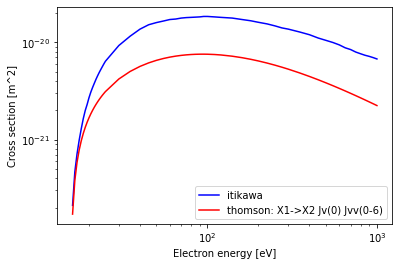

In [11]:
"""lastly, calculating the partial cross sections between two states and vibration modes.
   This is done without needed to calculating something else separately
"""
print('cross section sum for X1 ground to X2 transitions level 0-6')
partial_sigma_X1_X2_0 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[0], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 0, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_X2_1 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[0], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 1, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_X2_2 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[0], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 2, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_X2_3 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[0], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 3, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_X2_4 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[0], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 4, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_X2_5 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[0], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 5, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_X2_6 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[0], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 6, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)

"""adding up the X1 to X2 vibrational states"""
i = 0
total_sigma_X1_X2 = []
while i <len(partial_sigma_X1_X2_0):
    total_sigma_X1_X2.append(partial_sigma_X1_X2_0[i][1] + partial_sigma_X1_X2_1[i][1] + partial_sigma_X1_X2_2[i][1] + partial_sigma_X1_X2_3[i][1] + partial_sigma_X1_X2_4[i][1] + partial_sigma_X1_X2_5[i][1] + partial_sigma_X1_X2_6[i][1])
    i += 1

"""check on cross section by putting it into a list next to the energies"""
total_electron_sigma_X2 = []
i = 0
while i <len(total_sigma_X1_X2):
    total_electron_sigma_X2.append([ion_energy_itikawa[i], total_sigma_X1_X2[i]])
    i += 1
#print(total_electron_sigma_X2)
        
# for plotting purposes
cross_section_itikawa_m2 = [list_item * 10**-20 for list_item in cross_section_itikawa]
#print(cross_section_itikawa_m2)

fig_2 = plt.figure()
"""Plotting the partial cross sections against the itikawa cross sections"""
ax2 = fig_2.add_subplot(111)
ax2.plot(ion_energy_itikawa, cross_section_itikawa_m2, 'b-', label='itikawa')
ax2.plot(ion_energy_itikawa, total_sigma_X1_X2, 'r-', label='thomson: X1->X2 Jv(0) Jvv(0-6)')
# plot figure extras
plt.xlabel('Electron energy [eV]')
plt.ylabel('Cross section [m^2]')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()


cross section sum for X1 ground to A2 transitions level 0-6


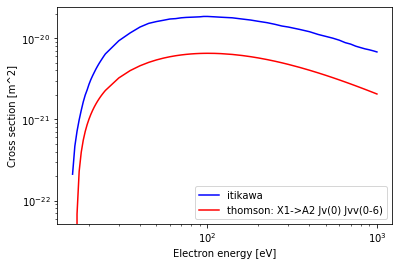

In [12]:
"""X1 to A2"""
print('cross section sum for X1 ground to A2 transitions level 0-6')
partial_sigma_X1_A2_0 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[1], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 0, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_A2_1 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[1], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 1, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_A2_2 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[1], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 2, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_A2_3 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[1], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 3, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_A2_4 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[1], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 4, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_A2_5 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[1], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 5, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_A2_6 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[1], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 6, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)

i = 0
total_sigma_X1_A2 = []
while i <len(partial_sigma_X1_A2_0):
    total_sigma_X1_A2.append(partial_sigma_X1_A2_0[i][1] + partial_sigma_X1_A2_1[i][1] + partial_sigma_X1_A2_2[i][1] + partial_sigma_X1_A2_3[i][1] + partial_sigma_X1_A2_4[i][1] + partial_sigma_X1_A2_5[i][1] + partial_sigma_X1_A2_6[i][1])
    i += 1

"""check on cross section against the energy"""
total_electron_sigma_A2 = []
i = 0
while i <len(total_sigma_X1_A2):
    total_electron_sigma_A2.append([ion_energy_itikawa[i], total_sigma_X1_A2[i]])
    i += 1
#print(total_electron_sigma_A2)


fig_3 = plt.figure()
ax2 = fig_3.add_subplot(111)
ax2.plot(ion_energy_itikawa, cross_section_itikawa_m2, 'b-', label='itikawa')
ax2.plot(ion_energy_itikawa, total_sigma_X1_A2, 'r-', label='thomson: X1->A2 Jv(0) Jvv(0-6)')
# plot figure extras
plt.xlabel('Electron energy [eV]')
plt.ylabel('Cross section [m^2]')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()


cross section sum for X1 ground to B2 transitions level 0-6


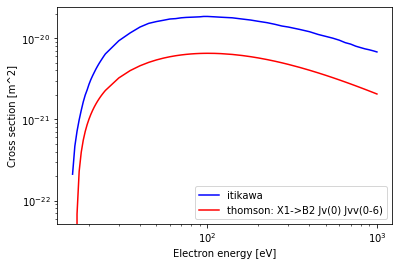

In [13]:
"""X1 to B2"""
print('cross section sum for X1 ground to B2 transitions level 0-6')
partial_sigma_X1_B2_0 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[2], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 0, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_B2_1 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[2], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 1, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_B2_2 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[2], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 2, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_B2_3 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[2], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 3, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_B2_4 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[2], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 4, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_B2_5 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[2], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 5, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)
partial_sigma_X1_B2_6 = thomson.partial_cross_section(constants.states_N2[0], constants.vib_constants_N2_dict, constants.rot_constants_N2_dict, 0, 15, constants.states_N2p[2], constants.vib_constants_N2p_dict, constants.rot_constants_N2p_dict, 6, 10, ion_energy_itikawa, cross_section_itikawa, thomson.func_guess, domain_temp)

i = 0
total_sigma_X1_B2 = []
while i <len(partial_sigma_X1_B2_0):
    total_sigma_X1_B2.append(partial_sigma_X1_B2_0[i][1] + partial_sigma_X1_B2_1[i][1] + partial_sigma_X1_B2_2[i][1] + partial_sigma_X1_B2_3[i][1] + partial_sigma_X1_B2_4[i][1] + partial_sigma_X1_B2_5[i][1] + partial_sigma_X1_B2_6[i][1])
    i += 1

"""check on cross section against the energy"""
total_electron_sigma_B2 = []
i = 0
while i <len(total_sigma_X1_B2):
    total_electron_sigma_B2.append([ion_energy_itikawa[i], total_sigma_X1_B2[i]])
    i += 1
#print(total_electron_sigma_B2)


fig_4 = plt.figure()
ax2 = fig_4.add_subplot(111)
ax2.plot(ion_energy_itikawa, cross_section_itikawa_m2, 'b-', label='itikawa')
ax2.plot(ion_energy_itikawa, total_sigma_X1_A2, 'r-', label='thomson: X1->B2 Jv(0) Jvv(0-6)')
# plot figure extras
plt.xlabel('Electron energy [eV]')
plt.ylabel('Cross section [m^2]')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()


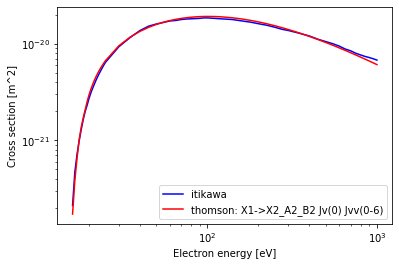

In [14]:
"""Since we have calculated each transistion from N2 X1Sigmag+ to the N2+ states,
   we're going to sum them to create the total cross section. We'll then compare
   our calculations to itikawa and see how close we get.
"""
i = 0
total_sigma_X1_X2_A2_B2 = []
while i <len(partial_sigma_X1_X2_0):
    total_sigma_X1_X2_A2_B2.append(total_sigma_X1_X2[i] + total_sigma_X1_A2[i] + total_sigma_X1_B2[i])
    i += 1


fig_4 = plt.figure()
ax2 = fig_4.add_subplot(111)
ax2.plot(ion_energy_itikawa, cross_section_itikawa_m2, 'b-', label='itikawa')
ax2.plot(ion_energy_itikawa, total_sigma_X1_X2_A2_B2, 'r-', label='thomson: X1->X2_A2_B2 Jv(0) Jvv(0-6)')
# plot figure extras
plt.xlabel('Electron energy [eV]')
plt.ylabel('Cross section [m^2]')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()
fig_4.savefig('partial_cross_section_N2_X1_N2+_Sum.png')


In [15]:
"""Using the total cross section, we can check the RMSE between our data
   and Itikawa's data.
"""
rmse_total_sigma = rmse(np.asarray(total_sigma_X1_X2_A2_B2)*1e20, np.asarray(cross_section_itikawa))
print(rmse_total_sigma)

0.045230846431164096
